In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD

In [3]:
train = pd.read_csv("./train_data.csv")

In [4]:
train

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,...,39,41,56,36,38,53,37,39,54,2
49996,255,245,132,254,247,134,255,249,137,254,...,249,174,79,252,181,81,253,181,76,6
49997,35,178,235,40,176,239,42,176,241,39,...,27,52,77,21,43,66,12,31,50,9
49998,189,211,240,186,208,236,185,207,235,184,...,195,184,169,196,189,171,195,190,171,1


In [5]:
x_train = train.drop(['label'], axis = 1).values
y_train = train['label'].values

In [6]:
x_train.shape

(50000, 3072)

In [7]:
x_train = x_train.reshape((50000, 32, 32, 3)).astype('float32')/255

In [8]:
test = pd.read_csv("./test_data.csv")

In [9]:
test

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,158,112,49,159,111,47,165,116,51,166,...,24,77,124,34,84,129,21,67,110,3
1,235,235,235,231,231,231,232,232,232,232,...,168,183,178,180,195,191,186,200,199,8
2,158,190,222,158,187,218,139,166,194,132,...,5,6,8,4,5,3,7,8,7,8
3,155,156,149,167,176,187,176,179,193,190,...,60,63,50,64,65,52,73,68,50,0
4,65,68,50,70,81,64,48,64,46,30,...,143,179,136,154,185,146,128,156,117,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,78,133,76,78,134,77,80,132,76,...,204,219,236,200,215,234,199,216,236,8
9996,81,57,43,91,69,53,98,75,63,106,...,155,139,129,171,167,147,167,164,160,3
9997,20,15,12,19,14,11,15,14,11,15,...,24,23,50,26,23,53,25,20,47,5
9998,25,40,12,15,36,3,23,41,18,17,...,93,124,80,95,123,81,92,120,80,1


In [10]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (32,32,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3),activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

sgd = SGD(learning_rate = 0.1)
model.compile(optimizer= sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

C:\Users\dmwad\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         802,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 823,050 (3.14 MB)

 Trainable params: 822,986 (3.14 MB)

 Non-trainable params: 64 (256.00 B)

In [11]:
r = model.fit(x_train, y_train, validation_split=0.2, epochs = 11, batch_size = 64)

Epoch 1/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.2356 - loss: 2.0842 - val_accuracy: 0.3774 - val_loss: 1.7470
Epoch 2/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.4763 - loss: 1.4361 - val_accuracy: 0.5460 - val_loss: 1.2282
Epoch 3/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.5849 - loss: 1.1644 - val_accuracy: 0.5901 - val_loss: 1.1729
Epoch 4/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.6405 - loss: 1.0179 - val_accuracy: 0.6501 - val_loss: 1.0061
Epoch 5/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.6848 - loss: 0.8888 - val_accuracy: 0.6471 - val_loss: 1.0281
Epoch 6/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 51ms/step - accuracy: 0.7176 - loss: 0.8045 - val_accuracy: 0.6180 - val_loss: 1.1054
Epoch 7/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.7537 - loss: 0.6963 - val_accuracy: 0.6714 - val_loss: 1.0005
Epoch 8/11
625/625 ━━━━━━━━━━━━━━━━━━━━ 32s 52ms/step - accuracy: 0.7793 - loss: 0.6188 - 

In [14]:
x_test = test.values

In [15]:
# x_test = x_test.reshape((10000, 32, 32, 3)).astype('float32')/255

ValueError: cannot reshape array of size 30730000 into shape (10000,32,32,3)

In [16]:
# predictions = model.predict(x_test)

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1/Cast:0", shape=(32, 3073), dtype=float32). Expected shape (None, 32, 32, 3), but input has incompatible shape (32, 3073)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32, 3073), dtype=int64)
  • training=False
  • mask=None

In [ ]:
predictions

In [ ]:
r.history.keys()

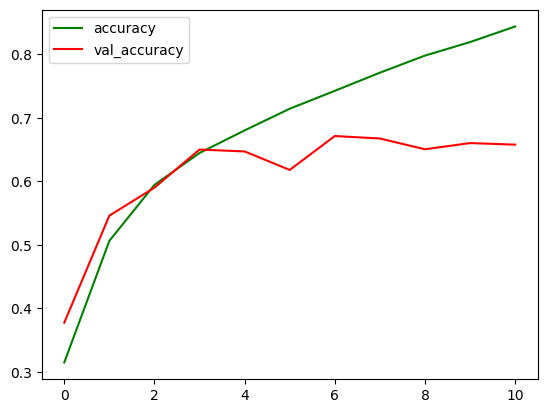

In [17]:
plt.plot(r.history['accuracy'], label = 'accuracy', color = 'green')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy', color = 'red')
plt.legend()

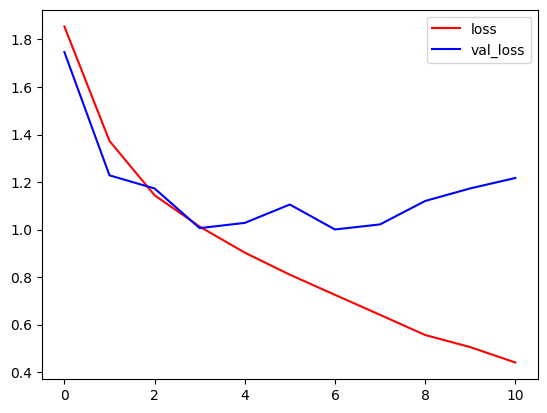

In [18]:
plt.plot(r.history['loss'], label = 'loss', color = 'red')
plt.plot(r.history['val_loss'], label = 'val_loss', color = 'blue')
plt.legend()

In [ ]:
'''
Here’s a detailed explanation and possible viva questions for the code provided, along with a line-by-line breakdown:

---

### **Line-by-Line Explanation:**

#### **1. Importing Libraries**
```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization, Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import SGD
```
**Explanation:**
- **`import pandas as pd`**: Imports the pandas library as `pd`, which is commonly used for data manipulation and analysis, specifically for working with structured data (like CSV files).
- **`import numpy as np`**: Imports NumPy as `np`, which is used for numerical operations, especially on arrays and matrices.
- **`import matplotlib.pyplot as plt`**: Imports Matplotlib for data visualization (e.g., plotting graphs and figures).
- **`import seaborn as sns`**: Imports Seaborn, a statistical data visualization library based on Matplotlib.
- **`import tensorflow as tf`**: Imports TensorFlow (tf), an open-source framework for machine learning and deep learning.
- **`from tensorflow.keras.layers import ...`**: Imports various layers (such as `Conv2D`, `Dense`, `Dropout`) from Keras (a high-level API for TensorFlow), used to define the model architecture.
- **`from tensorflow.keras.models import Model, Sequential`**: Imports `Model` and `Sequential` for defining the model structure.
- **`from tensorflow.keras.optimizers import SGD`**: Imports the Stochastic Gradient Descent (SGD) optimizer, used to minimize the loss during training.

**Viva Questions:**
- **Why are we using `pandas` and `numpy`?**
  - **Answer**: `Pandas` is used for data manipulation and reading CSV files, while `numpy` is used for efficient numerical computations, especially with arrays and matrices.
- **What is the purpose of `tensorflow` and `keras` in this code?**
  - **Answer**: `TensorFlow` is a deep learning framework, and `Keras` is an API within TensorFlow for building neural networks.

---

#### **2. Reading the Data**
```python
train = pd.read_csv("./train_data.csv")
train
x_train = train.drop(['label'], axis = 1).values
y_train = train['label'].values
x_train = x_train.reshape((50000, 32, 32, 3)).astype('float32')/255
test = pd.read_csv("./test_data.csv")
```
**Explanation:**
- **`train = pd.read_csv("./train_data.csv")`**: Loads the training data from a CSV file into a pandas DataFrame.
- **`x_train = train.drop(['label'], axis=1).values`**: Drops the `label` column (which is the target) and stores the features in `x_train`.
- **`y_train = train['label'].values`**: Stores the target variable `label` in `y_train`.
- **`x_train = x_train.reshape((50000, 32, 32, 3)).astype('float32')/255`**: Reshapes the feature data into a 4D array with shape `(50000, 32, 32, 3)` (representing 50,000 images of size 32x32 with 3 color channels), converts the data type to `float32`, and normalizes the pixel values to the range `[0, 1]` by dividing by 255.
- **`test = pd.read_csv("./test_data.csv")`**: Loads the test data from a CSV file into a DataFrame.

**Viva Questions:**
- **Why do you drop the `label` column in `x_train`?**
  - **Answer**: The `label` column contains the target values, so we drop it to keep only the feature values in `x_train` for training the model.
- **Why is `x_train` reshaped and normalized?**
  - **Answer**: Reshaping is done to fit the model's input dimensions (32x32x3), and normalization (by dividing by 255) is done to scale the pixel values between 0 and 1, which helps in faster convergence during training.

---

#### **3. Defining the Model**
```python
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (32,32,3), activation = 'relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))
```
**Explanation:**
- **`model = Sequential()`**: Initializes a Sequential model, where layers are added in a linear stack.
- **`model.add(Conv2D(32, (3,3), input_shape = (32,32,3), activation = 'relu'))`**: Adds a 2D convolutional layer with 32 filters, a kernel size of 3x3, input shape of (32, 32, 3) (representing an image of size 32x32 with 3 color channels), and ReLU activation function.
- **`model.add(BatchNormalization())`**: Adds batch normalization to normalize the outputs of the previous layer to stabilize and speed up training.
- **`model.add(Conv2D(64, (3,3), activation = 'relu'))`**: Adds another convolutional layer with 64 filters and ReLU activation.
- **`model.add(MaxPooling2D((2,2)))`**: Adds a max-pooling layer with a pool size of 2x2 to reduce spatial dimensions and computational load.
- **`model.add(Flatten())`**: Flattens the 3D output from the previous layer into a 1D vector.
- **`model.add(Dense(64, activation = 'relu'))`**: Adds a fully connected dense layer with 64 units and ReLU activation.
- **`model.add(Dropout(0.2))`**: Adds a dropout layer with a dropout rate of 0.2 to prevent overfitting by randomly setting 20% of the input units to zero during training.
- **`model.add(Dense(10, activation = 'softmax'))`**: Adds the output layer with 10 units (for 10 classes) and softmax activation to get probabilities for each class.

**Viva Questions:**
- **Why use `Conv2D` layers?**
  - **Answer**: `Conv2D` layers are used for extracting features from the input image by applying convolution operations.
- **What is the purpose of `BatchNormalization`?**
  - **Answer**: Batch normalization normalizes the output of the previous layer, which helps stabilize and speed up training by reducing internal covariate shifts.
- **Why is `MaxPooling2D` used?**
  - **Answer**: Max pooling reduces the spatial dimensions (height and width) of the feature maps, which reduces computation and helps prevent overfitting.
- **What does `Dropout` do?**
  - **Answer**: Dropout prevents overfitting by randomly setting a fraction of input units to zero during training.

---

#### **4. Compiling the Model**
```python
sgd = SGD(learning_rate = 0.1)
model.compile(optimizer= sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
```
**Explanation:**
- **`sgd = SGD(learning_rate = 0.1)`**: Initializes the Stochastic Gradient Descent (SGD) optimizer with a learning rate of 0.1.
- **`model.compile(optimizer= sgd, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])`**: Compiles the model with the SGD optimizer, sparse categorical cross-entropy loss (for multi-class classification), and accuracy as the evaluation metric.

**Viva Questions:**
- **What is the role of the `SGD` optimizer?**
  - **Answer**: The SGD optimizer updates the model’s weights using the gradient of the loss function, helping the model minimize the loss during training.
- **Why use `sparse_categorical_crossentropy` as the loss function?**
  - **Answer**: It’s used for multi-class classification tasks where the target labels are integers (not one-hot encoded).

---

#### **5. Training the Model**
```python
model.summary()
r = model.fit(x_train, y_train, validation_split=0.2, epochs = 11, batch_size = 64)
```
**Explanation:**
- **`model.summary()`**: Displays a summary of the model architecture, including the number of parameters and the layer details.
- **`r = model.fit(x_train, y_train, validation_split=0.2, epochs = 11, batch_size = 64)`**: Trains the model with the training data (`x_train` and `y_train`), using 20% of the data for validation, for 11 epochs with a batch size of 64.

**Viva Questions:**
- **What does `validation_split=0.2` do?**
  - **Answer**: It reserves 20% of the training data

 for validation during training, which helps monitor the model's performance on unseen data.
- **Why choose a batch size of 64?**
  - **Answer**: A batch size of 64 is a common choice as it provides a good trade-off between memory usage and training speed.

---

#### **6. Plotting the Results**
```python
plt.plot(r.history['accuracy'], label = 'accuracy', color = 'green')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy', color = 'red')
plt.legend()
plt.plot(r.history['loss'], label = 'loss', color = 'red')
plt.plot(r.history['val_loss'], label = 'val_loss', color = 'blue')
plt.legend()
```
**Explanation:**
- **`plt.plot()`**: Plots the accuracy and loss values from the training history (`r.history`), both for the training set and the validation set.
- **`plt.legend()`**: Adds a legend to the plot to label the different lines.

**Viva Questions:**
- **What is the significance of plotting `accuracy` and `loss` during training?**
  - **Answer**: Plotting accuracy and loss helps visualize the model's performance over time, allowing you to monitor whether the model is improving or overfitting.

---

#### **7. Model Predictions**
```python
x_test = test.values
predictions
```
**Explanation:**
- **`x_test = test.values`**: Converts the test data to a NumPy array.
- **`predictions`**: This line seems incomplete. It likely refers to generating predictions using the model, but it’s missing the code (e.g., `model.predict(x_test)`).

**Viva Questions:**
- **How would you generate predictions from the model?**
  - **Answer**: You can generate predictions using `model.predict(x_test)`.

---

These questions and explanations cover various aspects of the code and model training process. For a viva, be prepared to discuss the theory behind each of the concepts (e.g., Convolution, BatchNormalization, SGD, etc.) and their practical implications.
'''